In [67]:
import torch
from torch import nn
import numpy as np

import torchvision.datasets as datasets
from torchvision.transforms import ToTensor

In [68]:
# Downloading mnist datasets

# Importing only the first 1000 data to simplify the calcul
mnist_train = torch.utils.data.Subset(
    datasets.MNIST(root="./data", download=True, train=True, transform=ToTensor()),
    list(range(1000))
)

mnist_test = datasets.MNIST(
    root="./data",
    download=True,
    train=False,
    transform=ToTensor()
)

In [69]:
from torch.utils.data import DataLoader

# Defining dataloader
train_dataloader = DataLoader(mnist_train, batch_size=32, shuffle=True)
test_dataloader = DataLoader(mnist_test, batch_size=32, shuffle=True)

In [70]:
# Defining model (very complex to see overfiting)
model = nn.Sequential(
    nn.Linear(784, 500),
    nn.ReLU(),
    nn.Linear(500, 50),
    nn.ReLU(),
    nn.Linear(50, 50),
    nn.ReLU(),
    nn.Linear(50, 50),
    nn.ReLU(),
    nn.Linear(50, 10)
)

# Define loss function
criterion = nn.CrossEntropyLoss()

# Define optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [71]:
# Check X and y shapes
for X, y in train_dataloader:
    print(X.shape)
    print(y.shape)
    break

torch.Size([32, 1, 28, 28])
torch.Size([32])


In [72]:
# Train model and store train and test loss
train_losses = []
test_losses = []
for i in range(10):
    model.train()
    train_loss_sum = 0
    for X, y in train_dataloader:
        X = X.reshape(-1, 784)
        y = nn.functional.one_hot(y, num_classes=10).type(torch.float32)
        
        optimizer.zero_grad()
        y_pred = model(X)
        loss = criterion(y_pred, y)
        loss.backward()
        optimizer.step()

        train_loss_sum += loss.item()
    train_losses.append(train_loss_sum / len(train_dataloader))

    model.eval()
    test_loss_sum = 0
    with torch.no_grad():
        for X, y in test_dataloader:
            X = X.reshape(-1, 784)
            y = nn.functional.one_hot(y, num_classes=10).type(torch.float32)
            y_pred = model(X)
            loss = criterion(y_pred, y)

            test_loss_sum += loss.item()
        test_losses.append(test_loss_sum / len(test_dataloader))

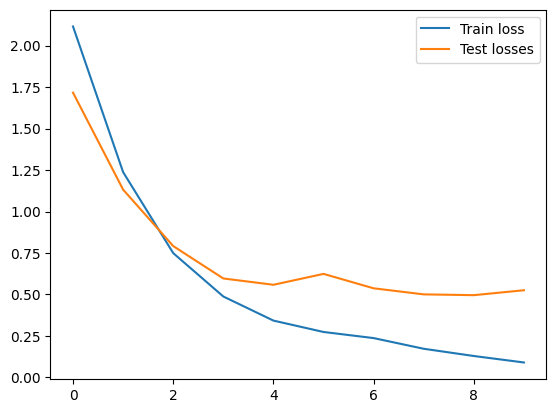

In [73]:
import matplotlib.pyplot as plt

plt.Figure()
plt.plot(train_losses, label="Train loss")
plt.plot(test_losses, label="Test losses")
plt.legend()
plt.show()